# DSCI 100 Group Project Report

## Predicting Spending Score for Customers Shopping

# Loading the Libraries

In [1]:
install.packages("kknn")
library(kknn)
library(tidyverse)
library(tidymodels)
options(repr.matrix.max.rows = 6)
library(repr)
library(GGally)
library(ISLR)
source("tests.R")
source("cleanup.R")

Updating HTML index of packages in '.Library'

Making 'packages.html' ...
 done

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.2     ✔ purrr   1.0.1
✔ tibble  3.2.1     ✔ dplyr   1.1.1
✔ tidyr   1.3.0     ✔ stringr 1.5.0
✔ readr   2.1.3     ✔ forcats 0.5.2
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
── Attaching packages ────────────────────────────────────── tidymodels 1.0.0 ──

✔ broom        1.0.2     ✔ rsample      1.1.1
✔ dials        1.1.0     ✔ tune         1.0.1
✔ infer        1.0.4     ✔ workflows    1.1.2
✔ modeldata    1.0.1     ✔ workflowsets 1.0.0
✔ parsnip      1.0.3     ✔ yardstick    1.1.0
✔ recipes      1.0.4     

── Conflicts ───────────────────────────────────────── tidymodels_conflicts() ──
✖ scales::discard() masks purrr::discard()
✖ dplyr::filter()   masks stats::filter()
✖ recipes::fixed()  masks strin

ERROR: Error in library(GGally): there is no package called ‘GGally’


# Introduction

Predicting the spending score of customers is crucial when operating a shop, for purposes such as planning targeted marketing campaigns, customized product offerings, and improving overall customer experience. In this project, we are exploring whether it is possible to accurately predict the spending score of shop customers using their age, family size, and annual income as predictors. Here, the spending score refers to a value between 0 to 100 that is proportional to the amount of money a customer spends in the shop. 

Since the value we are attempting to predict is numerical, we will be designing and training a KNN regression model. The selected dataset is Shop Customer Data that we have found in Kaggle, which includes the data of 2000 ideal customers collected through membership cards of an imaginative shop. Out of the 7 variables in this dataset, we specifically chose 3 predictors that we believe would have the most impact on determining a customer’s spending score. 

Data Source Link: https://raw.githubusercontent.com/Jaeyoung0209/dsci100-Group-Project/main/Customers.csv

# Methods

We will be excluding every variable other than Age, Family Size, Annual Income and Spending Score. We exclude variable Gender and Profession because they are qualitative. Work Experience is not included because the only reason it might affect a customer’s spending score is that those with more experience are typically paid more. However, this information would be redundant since annual income is already taken into consideration. 

Our predictive question is whether it is possible to accurately predict the spending score of shop customers using their age, family size, and annual income as predictors. In order to answer this question, we split our dataset into a training set, which is used for building the KNN regression model, and a testing set, which is used for seeing how our model performed. Therefore, we first built a KNN regression model using the training set with all the three variables “family size”, “annual income”, and “age” of consumers acting as the predictors and the spending score of the customers with membership on the shop as the response variable. Then, we use the model we built to predict the spending scores for the observations in the testing set and calculate the root mean squares between the predictions and the actual spending score to see how our model performed. 

However, we noticed that the RMSE of the model seemed unnaturally high as shown in Table 6, which indicates that at least one of our variables does not have a sufficient correlation with the customer spending score. The range of the spending score is just from 1 to 100 but the root mean square, which represents the error, is up to 28.05829. In order to find out why the model has a really high error, and to see if we can make some improvement to our model so as to make it become more accurate, we try to deplore the relationship between each independent variable and the response variable spending score.

Then, we build three separable KNN regression models for each variable to predict the root mean squares of them by the same testing and training set. Because the first KNN regression model is developing involves four variables, we cannot visualize this outcome in one plot since there are 4 dimensions. But we can generate a 2 dimensional scatter plot for each variable. Each scatter plot will have one of the 3 predictors on its x-axis and spending score on the y-axis, and a regression line that fixes the two predictors other than the one represented by the x-axes as zeros. This method of visualization will show how the change in each predictor will affect the prediction of our model that has been trained based on all three predictors.


# Data Analysis

In [2]:
#Loading the dataset from github url using read_csv into Jupyter.

url <- "https://raw.githubusercontent.com/Jaeyoung0209/dsci100-Group-Project/main/Customers.csv"
customer_data <- read_csv(url)
print("Table 1: The dataframe of the original data")
customer_data

Rows: 2000 Columns: 8
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (2): Gender, Profession
dbl (6): CustomerID, Age, Annual Income ($), Spending Score (1-100), Work Ex...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


[1] "Table 1: The dataframe of the original data"


CustomerID Gender Age Annual Income ($) Spending Score (1-100)
1    1          Male   19  15000             39                    
2    2          Male   21  35000             81                    
3    3          Female 20  86000              6                    
⋮    ⋮          ⋮      ⋮   ⋮                 ⋮                     
1998 1998       Male   87   90961            14                    
1999 1999       Male   77  182109             4                    
2000 2000       Male   90  110610            52                    
     Profession    Work Experience Family Size
1    Healthcare    1               4          
2    Engineer      3               3          
3    Engineer      1               1          
⋮    ⋮             ⋮               ⋮          
1998 Healthcare    9               2          
1999 Executive     7               2          
2000 Entertainment 5               2

In [5]:
# Clean the data set into tidy data

customer_data <- customer_data |>
    rename_all(~ gsub(" ", "_", .))

customer_data_tidy <- customer_data |>
    select("Age", "Annual_Income_($)", "Spending_Score_(1-100)", "Family_Size") |>
    rename("Annual_Income" = "Annual_Income_($)") |>
    rename("Spending_Score" = "Spending_Score_(1-100)")

print("Table 2: Tidy dataframe")
customer_data_tidy

[1] "Table 2: Tidy dataframe"


Age Annual_Income Spending_Score Family_Size
1    19  15000         39             4          
2    21  35000         81             3          
3    20  86000          6             1          
⋮    ⋮   ⋮             ⋮              ⋮          
1998 87   90961        14             2          
1999 77  182109         4             2          
2000 90  110610        52             2

# Data of The Predictors Summarized in Table

In this part, we will find out the maximum, minimum, and mean of our predictors (age, annual, family size, respectively) in the training set.

In [4]:
information_age <- customer_data_tidy |> summarize(average_age = mean(Age),
                                               maximum_age = max(Age),
                                               minimum_age = min(Age))
print("Table 3.1: Information about Age variable")
information_age

information_income <- customer_data_tidy |> summarize(average_income = mean(Annual_Income),
                                               maximum_income = max(Annual_Income),
                                               minimum_income = min(Annual_Income))
print("Table 3.2: Information about Annual Income variable")
information_income

information_size <- customer_data_tidy |> summarize(average_family_size = mean(Family_Size),
                                               maximum_family_size = max(Family_Size),
                                               minimum_family_size = min(Family_Size))
print("Table 3.3: Information about Family Size variable")
information_size

[1] "Table 3.1: Information about Age variable"


average_age maximum_age minimum_age
1 48.96       99          0

[1] "Table 3.2: Information about Annual Income variable"


average_income maximum_income minimum_income
1 110731.8       189974         0

[1] "Table 3.3: Information about Family Size variable"


average_family_size maximum_family_size minimum_family_size
1 3.7685              9                   1

# Visualizion of The Three Predictors

In this part, we will create histograms to visualize the distributions of our predictor variables in the training set.

[1] "Figure 1.1: Distribution of age "


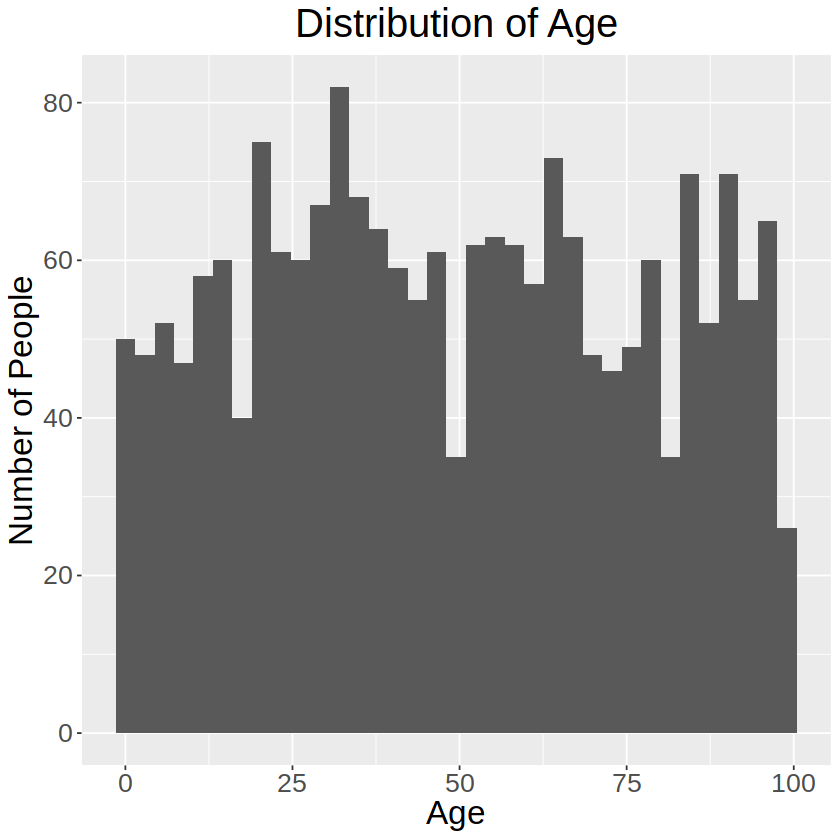

[1] "Figure 1.2: Distribution of annual income"


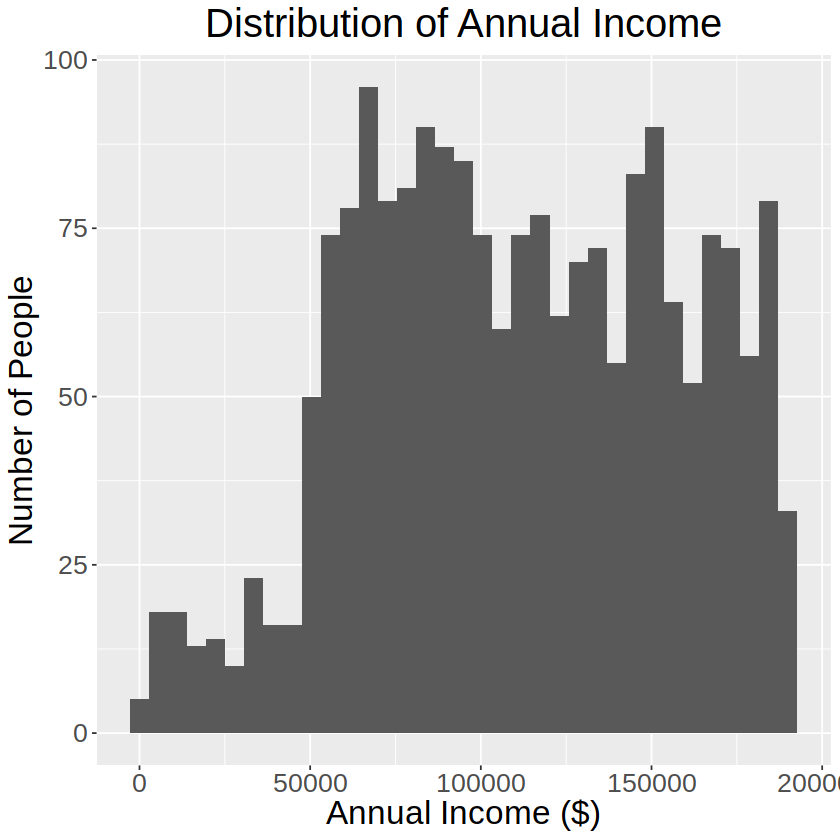

[1] "Figure 1.3: Distribution of family size"


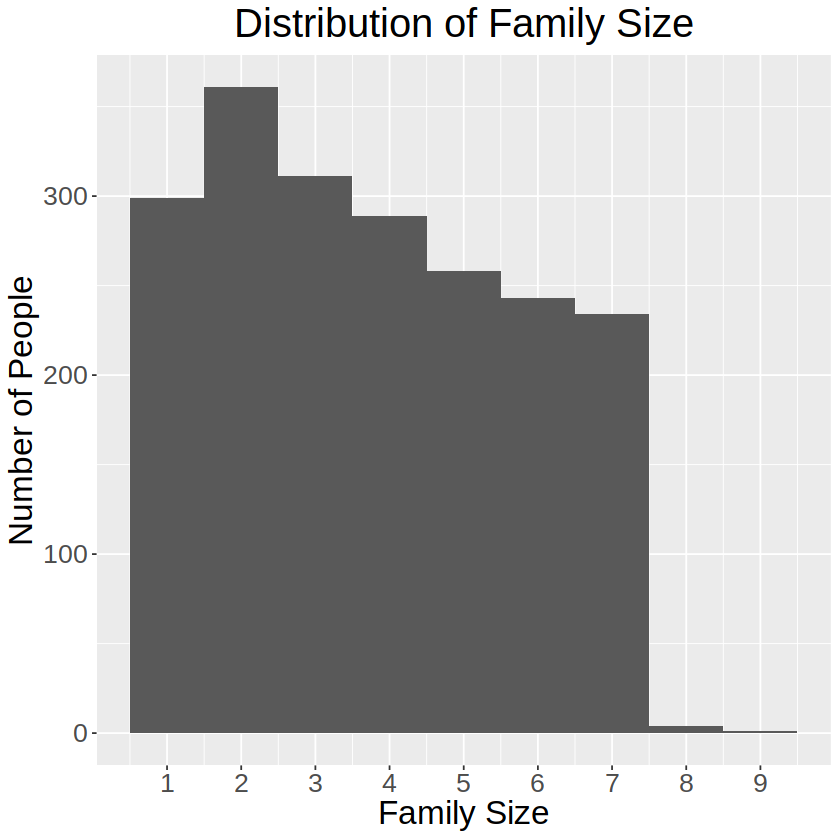

In [5]:
ages_plot <- ggplot(customer_data_tidy, aes(x = Age)) + geom_histogram(bins = 35) + xlab("Age") + ylab("Number of People") + ggtitle("Distribution of Age") + theme(text = element_text(size = 20)) + theme(plot.title = element_text(hjust = 0.5))
ages_plot
print("Figure 1.1: Distribution of age ")
income_plot <- ggplot(customer_data_tidy, aes(x = Annual_Income)) + geom_histogram(bins = 35) + xlab("Annual Income ($)") + ylab("Number of People") + ggtitle("Distribution of Annual Income") +theme(text = element_text(size = 20)) + theme(plot.title = element_text(hjust = 0.5))
income_plot 
print("Figure 1.2: Distribution of annual income")
family_size_plot <- ggplot(customer_data_tidy, aes(x = Family_Size)) + geom_histogram(bins = 35, binwidth = 1) + xlab("Family Size") + ylab("Number of People") + ggtitle("Distribution of Family Size") +theme(text = element_text(size = 20)) + theme(plot.title = element_text(hjust = 0.5)) + scale_x_continuous(breaks=seq(0,9,1))
family_size_plot 
print("Figure 1.3: Distribution of family size")

# Preliminary Exploratory Data Analysis

In [4]:

options(repr.plot.width = 8, repr.plot.height = 7)

# Spliting the initial tidy data set into training set and testing set.

set.seed(2000)

customer_split <- initial_split(customer_data_tidy, prop = 0.75, strata = Spending_Score)
customer_train <- training(customer_split)
customer_test <- testing(customer_split)

print("Table 4.1: Training dataset")
customer_train

print("Table 4.2: Testing dataset")
customer_test

[1] "Table 4.1: Training dataset"


Age Annual_Income Spending_Score Family_Size
1    20  86000          6             1          
2    35  31000          6             3          
3    67   7000         14             3          
⋮    ⋮   ⋮             ⋮              ⋮          
1496 54  118944        77             4          
1497 97  129444        96             6          
1498 19   54121        89             3

[1] "Table 4.2: Testing dataset"


Age Annual_Income Spending_Score Family_Size
1   19  15000         39             4          
2   23  59000         77             2          
3   31  38000         40             6          
⋮   ⋮   ⋮             ⋮              ⋮          
500 64  175254        100            5          
501 87   90961         14            2          
502 90  110610         52            2

In [7]:
# Creating the centered and scaling recipe containing all the predictors in the dataset

set.seed(2000)
recipe<-recipe(Spending_Score~Family_Size+Age+Annual_Income,data=customer_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

# Setting up the KNN regression model for tuning in order to choose the best K value
spec<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
set_engine("kknn")|>
set_mode("regression")

# Perform the crossing validation model with v=5 to the training set and find out the best K value with lowest average root mean square
vfold<-vfold_cv(customer_train,v=5,strata=Spending_Score)

workflow<-workflow()|>
add_recipe(recipe)|>
add_model(spec)

gridvals<-tibble(neighbors=seq(from=1,
                               to=100, by=1))

result<-workflow|>
tune_grid(resamples=vfold,
          grid=gridvals)|>
collect_metrics()|>
filter(.metric=="rmse")

print("Table 5.1: Root mean square deviation for all K values 1-100")
result
k_best<-result|>
filter(mean==min(mean))

print("Table 5.2: Average root mean square for each K value from 1-100 for all predictors")
k_best

[1] "Table 5.1: Root mean square deviation for all K values 1-100"


neighbors .metric .estimator mean     n std_err    .config               
1   1         rmse    standard   38.96625 5 0.39645214 Preprocessor1_Model001
2   2         rmse    standard   33.74943 5 0.23587404 Preprocessor1_Model002
3   3         rmse    standard   32.17156 5 0.08497219 Preprocessor1_Model003
⋮   ⋮         ⋮       ⋮          ⋮        ⋮ ⋮          ⋮                     
98   98       rmse    standard   27.99411 5 0.2497977  Preprocessor1_Model098
99   99       rmse    standard   27.99218 5 0.2527613  Preprocessor1_Model099
100 100       rmse    standard   27.99746 5 0.2480770  Preprocessor1_Model100

[1] "Table 5.2: Average root mean square for each K value from 1-100 for all predictors"


neighbors .metric .estimator mean     n std_err  .config               
1 89        rmse    standard   27.95112 5 0.234821 Preprocessor1_Model089

In [9]:
# Set up the KNN regression model for all predictors with the best K value
set.seed(2000)
kmin<-k_best|>pull(neighbors)
kmin_spec<-nearest_neighbor(weight_func="rectangular",neighbors=kmin)|>
set_engine("kknn")|>
set_mode("regression")

# Fit the KNN regression model of all the predictors
fit<-workflow()|>
add_recipe(recipe)|>
add_model(kmin_spec)|>
fit(data=customer_train)

# Predicting the Spending Score by the KNN regression model on the testing set and evaluating the model by using root mean square
summary<-fit|>
predict(customer_test)|>
bind_cols(customer_test)|>
metrics(truth=Spending_Score,estimate=.pred)|>
filter(.metric=="rmse")

print("Table 6: RMSE of the KNN regression model for all predictors")
summary

[1] "Table 6: RMSE of the KNN regression model for all predictors"


.metric .estimator .estimate
1 rmse    standard   28.08136

In [10]:
# Set up the recipe for predictor "Family Size"
set.seed(2000)
family_size_recipe<-recipe(Spending_Score~Family_Size,data=customer_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

# Setting up the KNN regression model for tuning in order to choose the best K value
family_size_spec<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
set_engine("kknn")|>
set_mode("regression")

# Finding out the best K value for the KNN regression model of predictor "Family Size" by using crossing validation
family_size_vfold<-vfold_cv(customer_train,v=5,strata=Spending_Score)

family_size_workflow<-workflow()|>
add_recipe(family_size_recipe)|>
add_model(family_size_spec)

gridvals<-tibble(neighbors=seq(from=1,
                               to=100, by=1))

family_size_result<-family_size_workflow|>
tune_grid(resamples=family_size_vfold,
          grid=gridvals)|>
collect_metrics()|>
filter(.metric=="rmse")

print("Table 7.1: Root mean square deviation of all K values 1-100 with Family Size as predictor")
family_size_result

family_size_k_best<-family_size_result|>
filter(mean==min(mean))

print("Table 7.2: Average Root mean square deviation of all K values 1-100 with Family Size as predictor")
family_size_k_best

[1] "Table 7.1: Root mean square deviation of all K values 1-100 with Family Size as predictor"


neighbors .metric .estimator mean     n std_err   .config               
1   1         rmse    standard   48.62365 5 1.0445154 Preprocessor1_Model001
2   2         rmse    standard   47.13036 5 0.6709446 Preprocessor1_Model002
3   3         rmse    standard   46.66985 5 0.1588734 Preprocessor1_Model003
⋮   ⋮         ⋮       ⋮          ⋮        ⋮ ⋮         ⋮                     
98   98       rmse    standard   33.15344 5 0.2625569 Preprocessor1_Model098
99   99       rmse    standard   33.02112 5 0.2479800 Preprocessor1_Model099
100 100       rmse    standard   32.87493 5 0.2353935 Preprocessor1_Model100

[1] "Table 7.2: Average Root mean square deviation of all K values 1-100 with Family Size as predictor"


neighbors .metric .estimator mean     n std_err   .config               
1 100       rmse    standard   32.87493 5 0.2353935 Preprocessor1_Model100

In [11]:
# Set up the KNN regression model for predictor "Family Size" with the best K value
set.seed(2000)
family_size_kmin<-family_size_k_best|>pull(neighbors)
family_size_kmin_spec<-nearest_neighbor(weight_func="rectangular",neighbors=kmin)|>
set_engine("kknn")|>
set_mode("regression")
# Fit the KNN regression model for predictor "Family Size"
family_size_fit<-workflow()|>
add_recipe(family_size_recipe)|>
add_model(family_size_kmin_spec)|>
fit(data=customer_train)
# Predicting the Spending Score by the KNN regression model on the testing set and evaluating the model by using root mean square
family_size_summary<-family_size_fit|>
predict(customer_test)|>
bind_cols(customer_test)|>
metrics(truth=Spending_Score,estimate=.pred)|>
filter(.metric=="rmse")

print("Table 8: RMSE of prediction on testing set with Family Size as predictor")
family_size_summary

[1] "Table 8: RMSE of prediction on testing set with Family Size as predictor"


.metric .estimator .estimate
1 rmse    standard   38.55082

[1] "Figure 2: Predicted values of Spending Score (blue line) with Family Size as predictor"


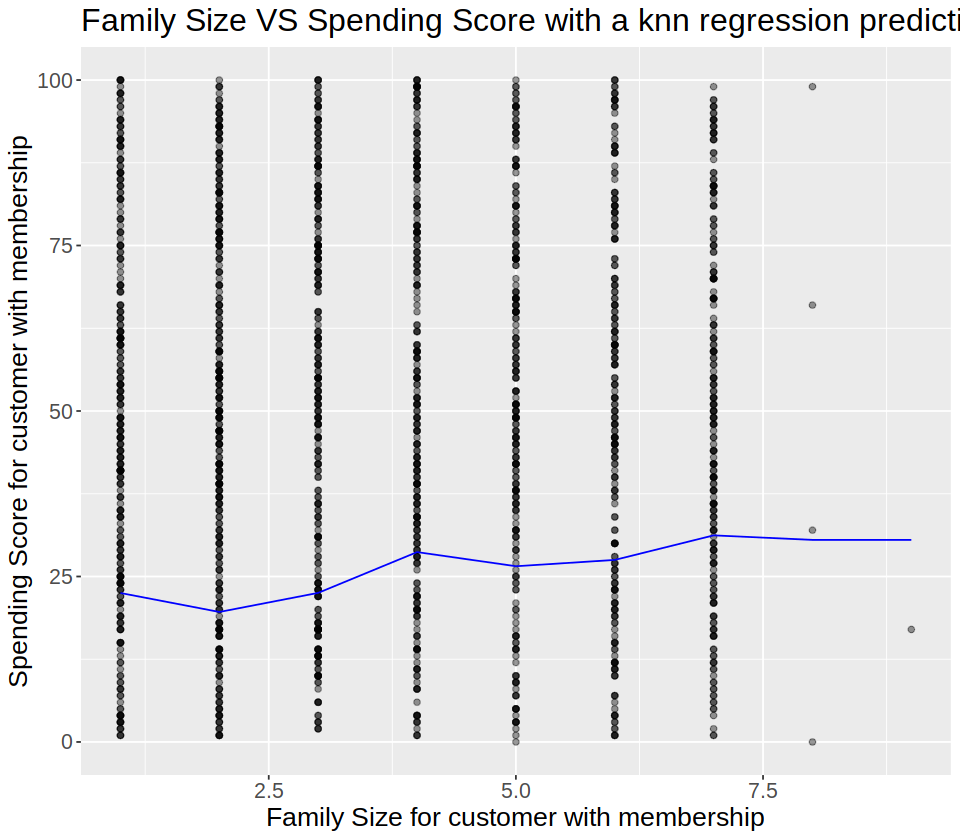

In [12]:
# Applying the KNN regression model of predictor "Family Size" across the range of all family size in the initial tidy data 
family_size_prediction_grid<-tibble(
    Family_Size=seq(
        from=customer_data_tidy|>select(Family_Size)|>min(),
        to=customer_data_tidy|>select(Family_Size)|>max(),
        by=1))

family_size_preds<-family_size_fit|>
predict(family_size_prediction_grid)|>
bind_cols(family_size_prediction_grid)

# Visualizing the prediction results for all the Family Size by using a scatter plot and a blue prediction line
spending_score_prediction_plot<-ggplot(customer_data_tidy,aes(x=Family_Size,y=Spending_Score))+
geom_point(alpha=0.4)+
geom_line(data=family_size_preds,
          mapping=aes(x=Family_Size,y=.pred),color="blue")+
labs(x="Family Size for customer with membership",
     y="Spending Score for customer with membership")+
ggtitle("Family Size VS Spending Score with a knn regression prediction line")+
theme(text = element_text(size = 16))

print("Figure 2: Predicted values of Spending Score (blue line) with Family Size as predictor")
spending_score_prediction_plot

In [13]:
# Set up the recipe for predictor "Age"
set.seed(2000)
age_recipe<-recipe(Spending_Score~Age,data=customer_train)|>
step_scale(all_predictors())|>
step_center(all_predictors())

# Setting up the KNN regression model for tuning in order to choose the best K value
age_spec<-nearest_neighbor(weight_func="rectangular",neighbors=tune())|>
set_engine("kknn")|>
set_mode("regression")

# Finding out the best K value for the KNN regression model of predictor "Age" by using crossing validation
age_vfold<-vfold_cv(customer_train,v=5,strata=Spending_Score)

age_workflow<-workflow()|>
add_recipe(age_recipe)|>
add_model(age_spec)

gridvals<-tibble(neighbors=seq(from=1,
                               to=100, by=1))

age_result<-age_workflow|>
tune_grid(resamples=age_vfold,
          grid=gridvals)|>
collect_metrics()|>
filter(.metric=="rmse")

print("Table 9.1: Root mean square deviation of all K values 1-100 with Age as predictor")
age_result

age_k_best<-age_result|>
filter(mean==min(mean))

print("Table 9.2: Average Root mean square deviation of all K values 1-100 with Age as predictor")
age_k_best

[1] "Table 9.1: Root mean square deviation of all K values 1-100 with Age as predictor"


neighbors .metric .estimator mean     n std_err   .config               
1   1         rmse    standard   43.70129 5 0.3623151 Preprocessor1_Model001
2   2         rmse    standard   41.16927 5 0.2700084 Preprocessor1_Model002
3   3         rmse    standard   39.79297 5 0.5365455 Preprocessor1_Model003
⋮   ⋮         ⋮       ⋮          ⋮        ⋮ ⋮         ⋮                     
98   98       rmse    standard   27.97512 5 0.2011960 Preprocessor1_Model098
99   99       rmse    standard   27.96624 5 0.2061303 Preprocessor1_Model099
100 100       rmse    standard   27.98854 5 0.2165211 Preprocessor1_Model100

[1] "Table 9.2: Average Root mean square deviation of all K values 1-100 with Age as predictor"


neighbors .metric .estimator mean     n std_err   .config               
1 99        rmse    standard   27.96624 5 0.2061303 Preprocessor1_Model099

In [14]:
# Set up the KNN regression model for predictor "Age" with the best K value
set.seed(2000)
age_kmin<-age_k_best|>pull(neighbors)
age_kmin_spec<-nearest_neighbor(weight_func="rectangular",neighbors=age_kmin)|>
set_engine("kknn")|>
set_mode("regression")
# Fit the KNN regression model for predictor "Age"
age_fit<-workflow()|>
add_recipe(age_recipe)|>
add_model(age_kmin_spec)|>
fit(data=customer_train)
# Predicting the Spending Score by the KNN regression model on the testing set and evaluating the model by using root mean square
age_summary<-age_fit|>
predict(customer_test)|>
bind_cols(customer_test)|>
metrics(truth=Spending_Score,estimate=.pred)|>
filter(.metric=="rmse")

print("Table 10: RMSE of prediction on testing set with Family Size as predictor")
age_summary

[1] "Table 10: RMSE of prediction on testing set with Family Size as predictor"


.metric .estimator .estimate
1 rmse    standard   28.38424

[1] "Figure 3: Predicted values of Spending Score (blue line) with Age as predictor"


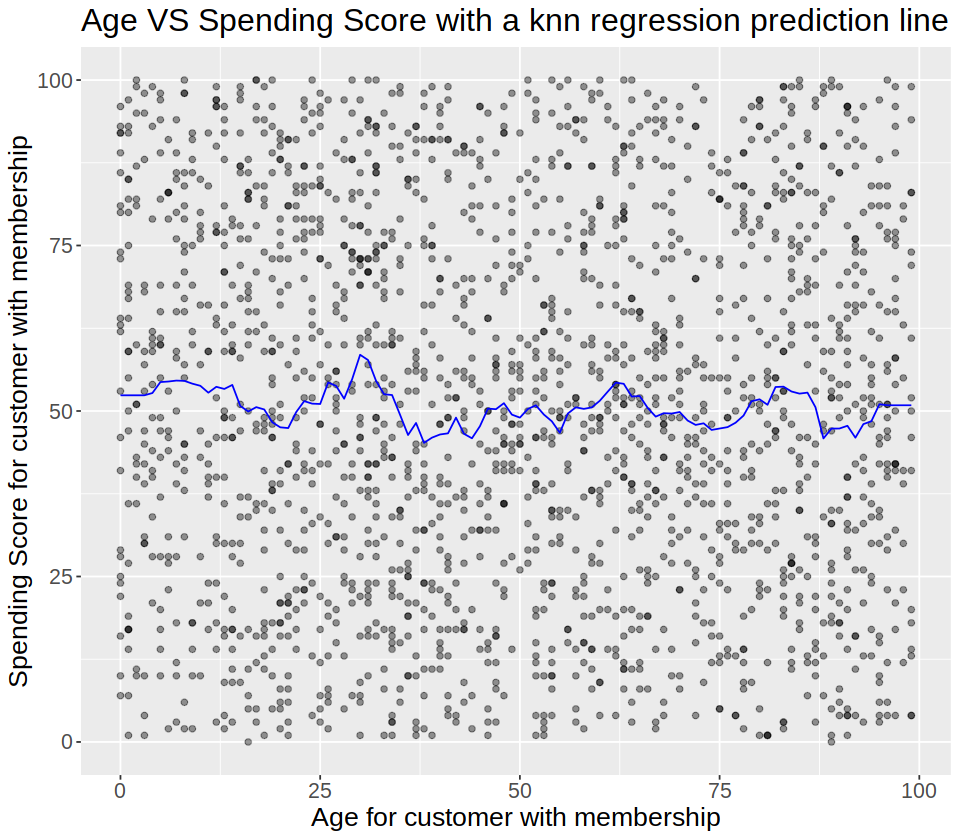

In [15]:
# Applying the KNN regression model of predictor "Age" across the range of all family size in the initial tidy data 
set.seed(2000)
age_prediction_grid<-tibble(
    Age=seq(
        from=customer_data_tidy|>select(Age)|>min(),
        to=customer_data_tidy|>select(Age)|>max(),
        by=1))
age_preds<-age_fit|>
predict(age_prediction_grid)|>
bind_cols(age_prediction_grid)
# Visualizing the prediction results for all the Age by using a scatter plot and a blue prediction line
spending_score_prediction_plot_with_age<-ggplot(customer_data_tidy,aes(x=Age,y=Spending_Score))+
geom_point(alpha=0.4)+
geom_line(data=age_preds,
          mapping=aes(x=Age,y=.pred),color="blue")+
labs(x="Age for customer with membership",
     y="Spending Score for customer with membership")+
ggtitle("Age VS Spending Score with a knn regression prediction line")+
 theme(text = element_text(size = 16))

print("Figure 3: Predicted values of Spending Score (blue line) with Age as predictor")
spending_score_prediction_plot_with_age

In [16]:
set.seed(2000)
# Set up the recipe for predictor "Annual Income"
annual_income_recipe <- recipe(Spending_Score ~ Annual_Income, data = customer_train) |>
    step_scale(all_predictors()) |>
    step_center(all_predictors())

# Setting up the KNN regression model for tuning in order to choose the best K value
annual_income_spec <- nearest_neighbor(weight_func = "rectangular", neighbors = tune()) |>
    set_engine("kknn") |>
    set_mode("regression")

# Finding out the best K value for the KNN regression model of predictor "Annual Income" by using crossing validation
annual_income_vfold <- vfold_cv(customer_train, v = 5, strata = Spending_Score)

annual_income_workflow <- workflow() |>
    add_recipe(annual_income_recipe)|>
    add_model(annual_income_spec)

gridvals <- tibble(neighbors = seq(from = 1 ,
                               to = 100 , by = 1))

annual_income_result <- annual_income_workflow |>
tune_grid(resamples = annual_income_vfold,
          grid = gridvals) |>
collect_metrics() |>
filter(.metric == "rmse")

print("Table 11.1: Root mean square deviation of all K values 1-100 with Annual Income as predictor")
annual_income_result

annual_income_k_best<-annual_income_result|>
filter(mean==min(mean))

print("Table 11.2: Average Root mean square deviation of all K values 1-100 with Annual Income as predictor")
annual_income_k_best

[1] "Table 11.1: Root mean square deviation of all K values 1-100 with Annual Income as predictor"


neighbors .metric .estimator mean     n std_err   .config               
1   1         rmse    standard   38.53484 5 0.7913872 Preprocessor1_Model001
2   2         rmse    standard   33.93775 5 0.6071114 Preprocessor1_Model002
3   3         rmse    standard   31.98940 5 0.4487390 Preprocessor1_Model003
⋮   ⋮         ⋮       ⋮          ⋮        ⋮ ⋮         ⋮                     
98   98       rmse    standard   28.02076 5 0.1808013 Preprocessor1_Model098
99   99       rmse    standard   28.01556 5 0.1838335 Preprocessor1_Model099
100 100       rmse    standard   28.01408 5 0.1825984 Preprocessor1_Model100

[1] "Table 11.2: Average Root mean square deviation of all K values 1-100 with Annual Income as predictor"


neighbors .metric .estimator mean     n std_err  .config               
1 80        rmse    standard   28.00467 5 0.212047 Preprocessor1_Model080

In [17]:
# Set up the KNN regression model for predictor "Annual Income" with the best K value
set.seed(2000)
annual_income_kmin<-annual_income_k_best|>pull(neighbors)
annual_income_kmin_spec<-nearest_neighbor(weight_func="rectangular",neighbors=annual_income_kmin)|>
set_engine("kknn")|>
set_mode("regression")

# Fit the KNN regression model for predictor "Annual Income"
annual_income_fit<-workflow()|>
add_recipe(annual_income_recipe)|>
add_model(annual_income_kmin_spec)|>
fit(data=customer_train)

# Predicting the Spending Score by the KNN regression model on the testing set and evaluating the model by using root mean square
annual_income_summary<-annual_income_fit|>
predict(customer_test)|>
bind_cols(customer_test)|>
metrics(truth=Spending_Score,estimate=.pred)|>
filter(.metric=="rmse")

print("Table 12: RMSE of prediction on testing set with Annual Income as predictor")
annual_income_summary

[1] "Table 12: RMSE of prediction on testing set with Annual Income as predictor"


.metric .estimator .estimate
1 rmse    standard   28.17234

[1] "Figure 4: Predicted values of Spending Score (blue line) with Annual Income as predictor"


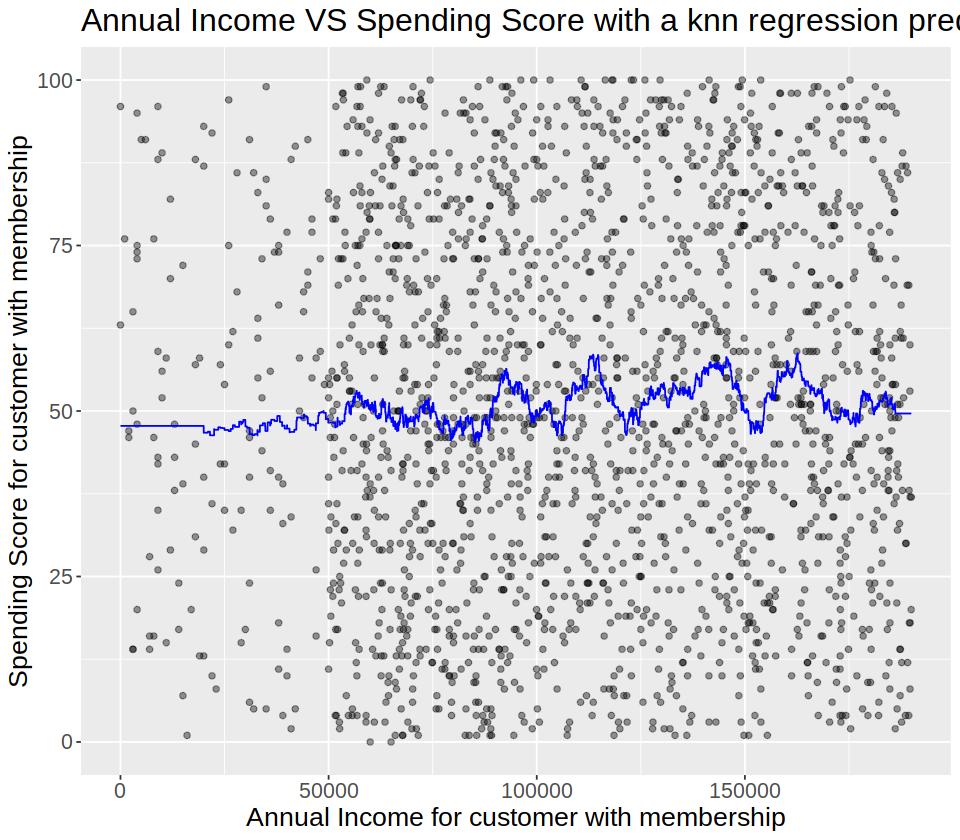

In [18]:
# Applying the KNN regression model of predictor "Annual Income" across the range of all family size in the initial tidy data 
set.seed(2000)
annual_income_prediction_grid<-tibble(
    Annual_Income=seq(
        from=customer_data_tidy|>select(Annual_Income)|>min(),
        to=customer_data_tidy|>select(Annual_Income)|>max(),
        by=10
    ))
annual_income_preds<-annual_income_fit|>
predict(annual_income_prediction_grid)|>
bind_cols(annual_income_prediction_grid)

# Visualizing the prediction results for all the Annual Income by using a scatter plot and a blue prediction line
spending_score_prediction_plot_with_annual_income<-ggplot(customer_data_tidy,aes(x=Annual_Income,y=Spending_Score))+
geom_point(alpha=0.4)+
geom_line(data=annual_income_preds,
          mapping=aes(x=Annual_Income,y=.pred),color="blue")+
labs(x="Annual Income for customer with membership",
     y="Spending Score for customer with membership")+
ggtitle("Annual Income VS Spending Score with a knn regression prediction line")+
 theme(text = element_text(size = 16))

print("Figure 4: Predicted values of Spending Score (blue line) with Annual Income as predictor")
spending_score_prediction_plot_with_annual_income

# Expected Outcomes and Significance

Originally, We expected there to be a positive relationship between family size and spending score, as customers with larger families would spend more to support their household needs. We also believed that there would be a proportional relationship between annual income and spending score, because those who earn more will have the flexibility to spend more. Age was also a particular one that we chose because we expected that people of different ages would have keen interests that would cause them to spend their earnings rationally or irrationally. For example, people aged 16-24 would be careless with their spending as their mentality with money is new and would thus, be compulsively higher than the majority. Since we believed our predictors to have a meaningful correlation with spending score, we also expected decent performance from our final model that combined all 3 predictors as well.

However, the final results were rather surprising, since none of the variables seemed to show a clear correlation with the customer spending score. Each of the models that we built had extremely high RMSE values as shown in Table 6, Table 8, Table 10, and Table 12, with the points on the scatter plots spread out evenly instead of resembling any signs of relationships between the variables. We believe that this problem is due to an issue with the dataset itself. It is intuitive to think that "as the family size expands, so do certain costs" (Graham, 2021), which would lead to greater spending. However, Figure 2 does not reflect any sign of this relationship, which seems unnatural. On top of this, the distribution for the scatter plots for Figure 3 and Figure 4 looks too uniform, which might be an indication that these values might have been generated randomly rather than reflecting realistic customer spending behaviours. 

If we successfully attained meaningful results from this analysis, it might have been helpful for stores to plan their marketing strategy. For instance, stores can have deals or promotions that target specific age groups to maximize profit. If the results show a positive relationship between family size and spending score, they could also plan promotions for family products since customers with larger family sizes typically have a greater budget to spend in-store. But we cannot make these conclusions since our data conveys no relationships between any of the 3 predictors and spending score. Therefore, the only conclusion can make is that there is no relationship between age, annual income, family size, and spending score.

This result leads to the question of whether our methods would lead to a similar outcome if they were to be conducted on a dataset that uses real-world data. If the result is meaningful, we can also explore whether they are consistent throughout different types of shops, since our dataset does not specify. Considering that different products have different “sensitivity of the quantity demanded for … a change in the real income of consumers” (Hayes, 2023), it is logical to think that a shop that sells luxury items such as jewelry would show a positive relationship between income and spending score. On the other hand, a shop that sells inferior goods such as used clothing might have an opposite relationship, where the customer will have less spending score the greater their annual income. 


# Reference

Graham, O. (2021, April 16). Mobility basics: Understanding spendables. ECA International. https://www.eca-international.com/insights/blog/april-2021/mobility-basics-understanding-spendables 

Hayes, A. (2023, March). Income elasticity of demand: Definition, formula, and types. Investopedia. https://www.investopedia.com/terms/i/incomeelasticityofdemand.asp 